In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('Training_Data_Set.csv')

In [3]:
# Drop missing values for key columns
df.dropna(subset=['Distance ', 'engine_power'], inplace=True)

In [4]:
# Rename columns for easier access
df.rename(columns={
    'Distance ': 'Distance',
    'Owner Type': 'Owner_Type',
    'Age of car': 'Age_of_car',
    'Vroom Audit Rating': 'Vroom_Audit_Rating'
}, inplace=True)

In [5]:
# Select features and target
X = df[['Maker', 'model', 'Location', 'Distance', 'Owner_Type',
        'manufacture_year', 'Age_of_car', 'engine_displacement',
        'engine_power', 'Vroom_Audit_Rating', 'transmission', 'fuel_type']]
y = df['Price']

In [6]:
# Define categorical and numerical features
categorical = ['Maker', 'model', 'Location', 'Owner_Type', 'transmission', 'fuel_type']
numerical = ['Distance', 'manufacture_year', 'Age_of_car', 'engine_displacement',
             'engine_power', 'Vroom_Audit_Rating']

In [7]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Full modeling pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

In [8]:
# Train/test split - Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance',
                                                   'manufacture_year',
                                                   'Age_of_car',
                                                   'engine_displacement',
                                                   'engine_power',
                                                   'Vroom_Audit_Rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Maker', 'model', 'Location',
                                                   'Owner_Type', 'transmission',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

In [10]:
# Predict
y_pred = pipeline.predict(X_test)


In [11]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 471385.04
R² Score: 0.71


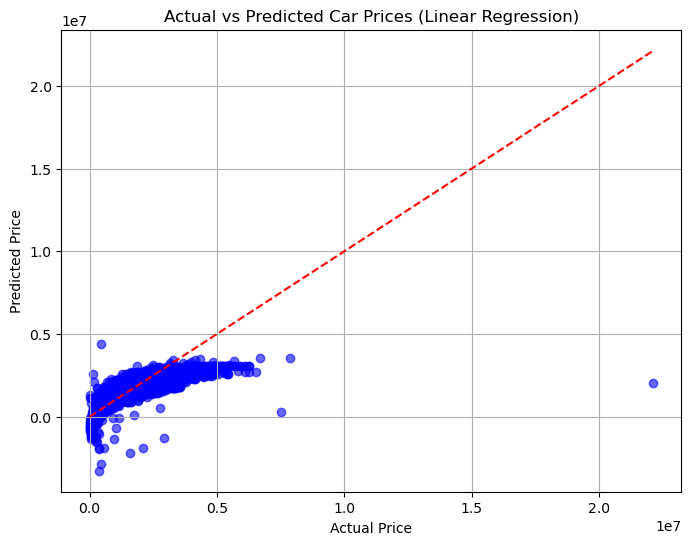

In [12]:
# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices (Linear Regression)')
plt.grid(True)
plt.show()

In [13]:
# Logistic Regression
# Create price category: Low, Medium, High
y_class = pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])

In [14]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [17]:
logistic_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logistic_pipeline.fit(X_train_log, y_train_log)
y_pred_log = logistic_pipeline.predict(X_test_log)

In [20]:
# Evaluation
print("\n📊 Logistic Regression Evaluation:")
print(classification_report(y_test_log, y_pred_log))



📊 Logistic Regression Evaluation:
              precision    recall  f1-score   support

        High       0.92      0.92      0.92      3468
         Low       0.91      0.90      0.91      3405
      Medium       0.82      0.83      0.82      3351

    accuracy                           0.88     10224
   macro avg       0.88      0.88      0.88     10224
weighted avg       0.88      0.88      0.88     10224



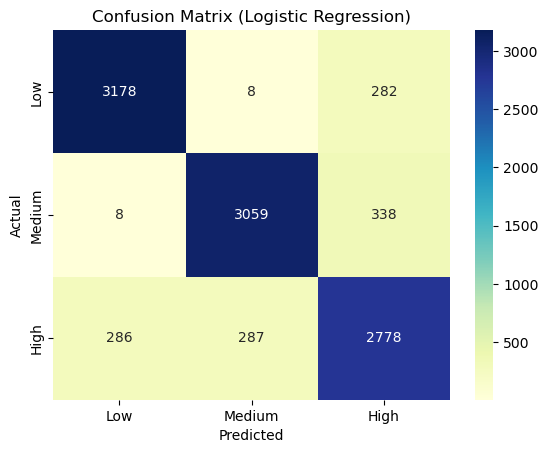

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()